# Plotting for Exploratory Data Analysis(EDA) for Cancer Patients

#### Habermans Dataset
    Sources: (a) Donor: Tjen-Sien Lim (b) Date: March 1999

       Past Usage:

    Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Number of Instances: 306
#### Number of Attributes: 4 (including the class attribute)

### Attribute Information:
* Age of patient at time of operation (numerical)
* Patients year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
* Missing Attribute Values: None

### Objective:
    
* Classify a new patient according to one of the 2 classes If the patient is survived 5 years/longer or not by using the 3 features(Age,Treatement_Year, +ve lymph nodes

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/habermans-survival-data-set/haberman.csv


In [22]:
# check for the input dataset
import os
print(os.listdir('../input'))

['habermans-survival-data-set']


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

In [24]:
#Reading haberman.csv to a Dataframe named df
# load the dataset

df = pd.read_csv('/kaggle/input/habermans-survival-data-set/haberman.csv', header=None, names=['Age', 'Operation_year', 'Axil_nodes', 'Survived_status'])
print(df.head())

   Age  Operation_year  Axil_nodes  Survived_status
0   30              64           1                1
1   30              62           3                1
2   30              65           0                1
3   31              59           2                1
4   31              65           4                1


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_year   306 non-null    int64
 2   Axil_nodes       306 non-null    int64
 3   Survived_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


### Observations:

* There are no missing values in this dataset. So there is no need to do data imputation.
* This is a binary classification problem as there are only 2 classes.
* The datatype of 'survival_status_after_5_years' column is integer. It has to be converted to categorical datatype.
* The values of 'survival_status_after_5_years' column are not meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)
* The dataset is quite imbalanced as one class has 73% records while the other has only 26% records. Will see about how to balance the target variable by using imbalcanced techniques later

In [26]:
print("No. of rows: "+str(df.shape[0]))
print("No. of columns: "+str(df.shape[1]))
print("Columns: "+", ".join(df.columns))
print("Target variable distribution")
print(df['Survived_status'].value_counts())
print("*"*40)
print(df['Survived_status'].value_counts(normalize = True))

No. of rows: 306
No. of columns: 4
Columns: Age, Operation_year, Axil_nodes, Survived_status
Target variable distribution
1    225
2     81
Name: Survived_status, dtype: int64
****************************************
1    0.735294
2    0.264706
Name: Survived_status, dtype: float64


In [27]:
# modify the target column values to be meaningful as well as categorical
df['Survived_status'] = df['Survived_status'].map({1:"yes", 2:"no"})
df['Survived_status'] = df['Survived_status'].astype('category')
print(df.head())

   Age  Operation_year  Axil_nodes Survived_status
0   30              64           1             yes
1   30              62           3             yes
2   30              65           0             yes
3   31              59           2             yes
4   31              65           4             yes


In [28]:
df['Survived_status'].value_counts()

yes    225
no      81
Name: Survived_status, dtype: int64

* This shows Only 225 patients survived 5 years or longer and 81 patients died within 5 year

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              306 non-null    int64   
 1   Operation_year   306 non-null    int64   
 2   Axil_nodes       306 non-null    int64   
 3   Survived_status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


### Statistical Summary

In [30]:
print(df.describe())

              Age  Operation_year  Axil_nodes
count  306.000000      306.000000  306.000000
mean    52.457516       62.852941    4.026144
std     10.803452        3.249405    7.189654
min     30.000000       58.000000    0.000000
25%     44.000000       60.000000    0.000000
50%     52.000000       63.000000    1.000000
75%     60.750000       65.750000    4.000000
max     83.000000       69.000000   52.000000


#### Observations:
    
    From the describe function we now know that -

    Age

* The average age is 52.4 years
* The youngest patient is 30 years old
* The oldest patient is 83 years old

    Operation_year

* 1958 is the year the survey (data collection) began
* The data collection went on till 1969

    Axil_nodes

* There are quite a few patients with 0 positive axillary nodes
* On average the patients had 4 nodes
* There was also instances where patients had positive axillary as high as 52

    std deviation of 10.80 for age shows that the spread of age the heterogeneity is more than other features

In [32]:
#Total no. of patients every year
print(df['Operation_year'].value_counts().sort_index())

58    36
59    27
60    28
61    26
62    23
63    30
64    31
65    28
66    28
67    25
68    13
69    11
Name: Operation_year, dtype: int64



* As no. of patients every year are not nearly equal, there is a high probability that more people might die / survive in year with higher no. of patients

In [34]:
#Patients who survived with 0 axilary nodes

ax_0 = (df['Axil_nodes'] == 0).value_counts()[1]
surv_0 = ((df['Survived_status'] == 'yes') & (df['Axil_nodes'] == 0)).value_counts()[1]
dead_0 = ((df['Survived_status'] == 'no') & (df['Axil_nodes'] == 0)).value_counts()[1]
print("No. of patients with 0 axiliary nodes : ", ax_0)
print("No. of patients who had 0 axiliary nodes and survived : ",surv_0)
print("No. of patients who had 0 axiliary nodes and still died : ",dead_0)

No. of patients with 0 axiliary nodes :  136
No. of patients who had 0 axiliary nodes and survived :  117
No. of patients who had 0 axiliary nodes and still died :  19


In [36]:
#color co-ordinating 'status' feature as green and red

colors = {'yes': 'green', 'no': 'red'}

### Univariate Analysis:

* Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable" so, in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

#### 1)Histograms:

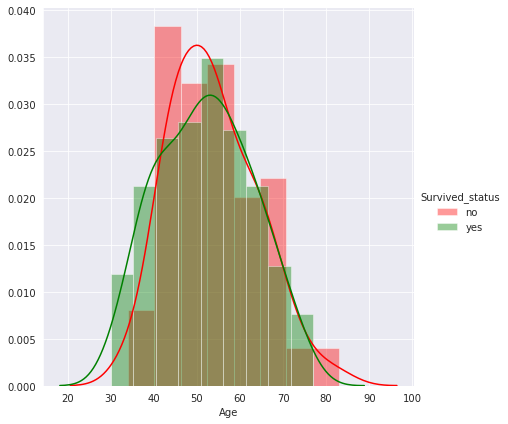

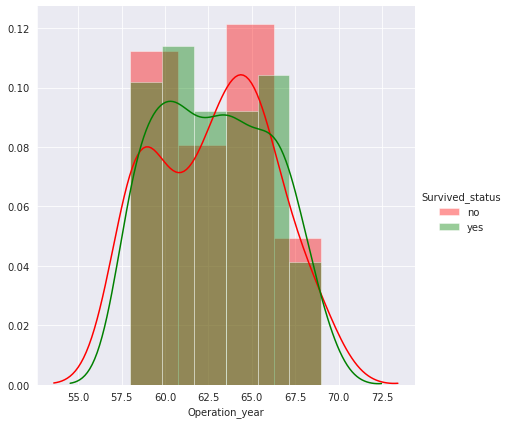

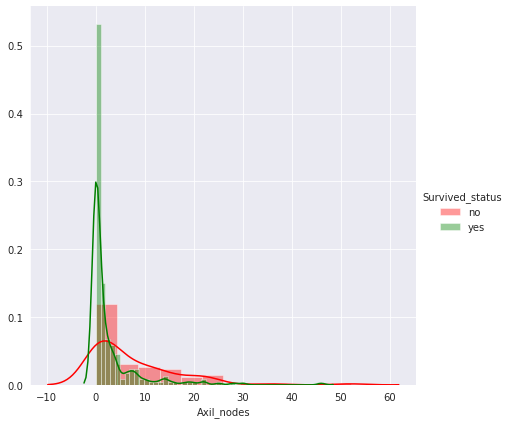

In [38]:
#plotting histograms for all features

sns.set_style('darkgrid')
for idx,feature in enumerate(df.columns[:-1]):
    f = sns.FacetGrid(df, hue = 'Survived_status',height = 6, palette = ['red','green'])\
           .map(sns.distplot, feature)\
           .add_legend()
plt.show()

#### Observations:
* From the histogram of age feature it might look like as if patients between age 30 and 34 have high probability of survival and patients above 76-77 don't survive.
* PDF of patients who died is normally distributed.
* But that might not be the case because considering the dataset is imbalanced, these kind of illegible analysis is pretty much futile.
* If a patient has only 1-2 nodes, his chances of survival increases drastically.
* Most of the data (especially year and age) is overlapping too much to differentiate between survival_status

#### 2)PDF & CDF:

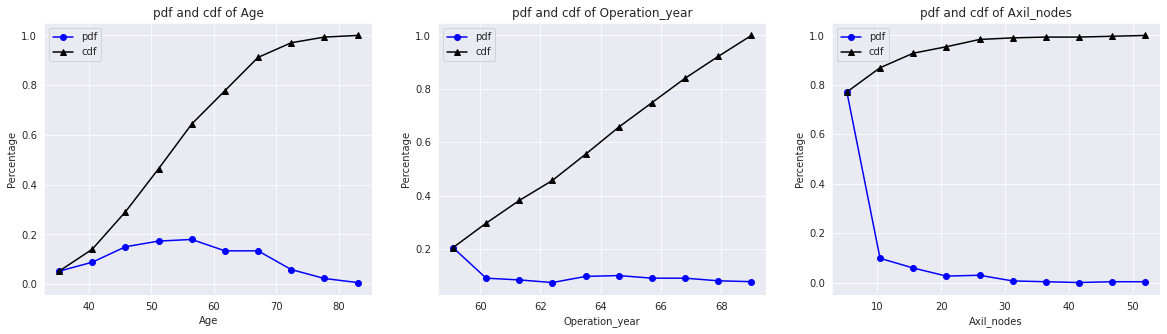

In [39]:
#pdf and cdf of all features

plt.figure(figsize=(20,5))
for idx, features in enumerate(df.columns[:-1]):
    plt.subplot(1, 3, idx+1)
    counts, bin_edges = np.histogram(df[features], bins = 10, density = True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,'bo-')
    plt.plot(bin_edges[1:],cdf,'k^-')
    plt.title("pdf and cdf of "+str(features))
    plt.xlabel(features)
    plt.ylabel("Percentage")
    labels = ['pdf','cdf']
    plt.legend(labels)

### Observation:

   Age
* Only 15% patients are younger than 40.
* More than 60% patients are older than 50.
* Around 90% patients are younger than 67.
    
    Operation_Year
* 20% operations were performed before year 1959.
   
   Axil_Nodes
* Almost 80% patients had nodes less than 3.
* Only 15-17% patients had nodes greater than 10.

In [40]:
#Creating seperate dataframes for patients with different status

dead = df.loc[df["Survived_status"] == 'no']
surv = df.loc[df["Survived_status"] == 'yes']

In [41]:
# Status of patients who were dead within 5 years of Operation year
dead.describe()

,Age,Operation_year,Axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observations :
* 81 patients died before 5 years after year of operation
* Average age of patients who died was 53 (At the time of operation)
* Youngest patient was 34 years old
* Oldest patient was 83 years old.

In [43]:
# Status of Patients who survived

surv.describe()

,Age,Operation_year,Axil_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


### Observations :
* 225 patients survived for more than 5 years after year of operation
* Average age of patients who survived was 52 (At the time of operation)
* Youngest patient was 30 years old
* Oldest patient was 77 years old.

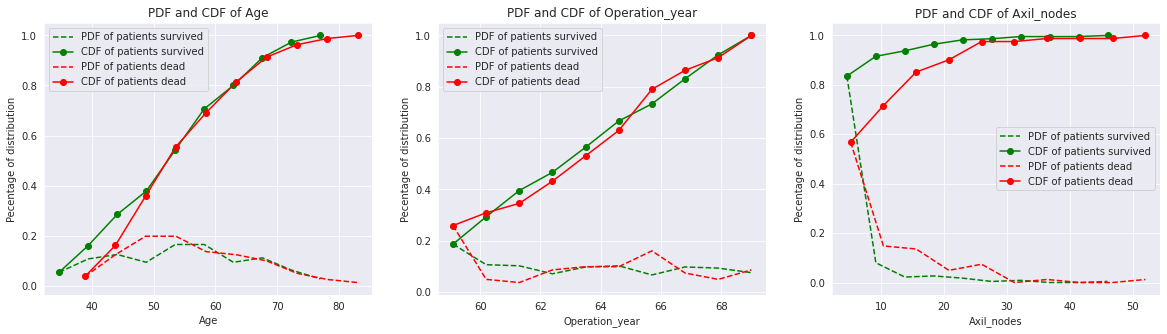

In [44]:
#PDF's and CDF's of all features for both survived and dead patients

plt.figure(figsize=(20,5))
for idx, features in zip(enumerate(surv.columns[:-1]),enumerate(dead.columns[:-1])):
    plt.subplot(1, 3, idx[0]+1)
    counts, bin_edges = np.histogram(surv[features[1]], bins = 10, density = True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,'g--')
    plt.plot(bin_edges[1:],cdf,'go-')
    
    counts, bin_edges = np.histogram(dead[features[1]], bins = 10, density = True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,'r--')
    plt.plot(bin_edges[1:],cdf,'ro-')
    
    plt.title("PDF and CDF of "+str(features[1]))
    plt.xlabel(features[1])
    plt.ylabel("Pecentage of distribution")
    labels = ['PDF of patients survived','CDF of patients survived',\
              'PDF of patients dead','CDF of patients dead']
    plt.legend(labels)


### Observations :

    Age

* More than 40% patients were younger than 50 and died before operation
* 30% were younger than 45 who were alive.
* 18% were younger than 45 who died before 5 years.

    Operation_Year

* Slightly Higher percentage of patients died in operation year 59 - 60 and 65 - 67
* Slightly Higher percentage of patients survived between 61 and 65

    Axil_Nodes

* Almost 90% patients who survived had less than 5 nodes
* 60% who died had less than 5 nodes
* Really few % of patients who died had 25+ nodes.

#### 3)Boxplots:

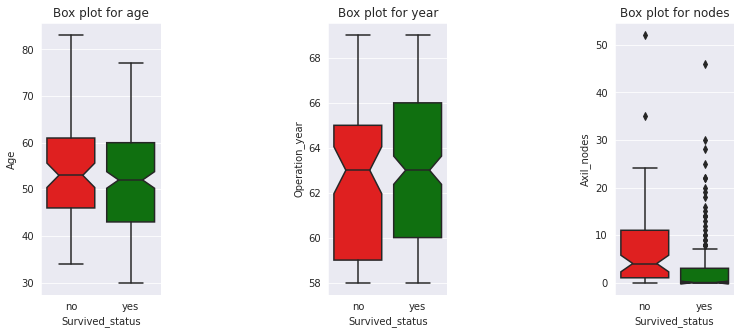

In [45]:
#Box Plot using patients age.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.figure(1)
plt.subplot(161)
sns.boxplot(x='Survived_status',y='Age',data=df,notch = True,palette=['red','green']).set_title("Box plot for age")

#Box Plot using Patients operation year.
plt.subplot(163)
sns.boxplot(x='Survived_status',y='Operation_year',data=df,notch = True,palette=['red','green']).set_title("Box plot for year")

#Box Plot using no. of positive axillary nodes.
plt.subplot(165)
sns.boxplot(x='Survived_status',y='Axil_nodes',data=df,notch = True,palette=['red','green']).set_title("Box plot for nodes")
plt.show()

### Observations :

    Age

* Age box plot overlap almost exactly

    Operation_Year

* Year box plot overlap almost exactly, but it seems like the patients who had their operation after 1960 had slightly better chance of survival.

    Axil_Nodes

* Quite more than 75% patients who survived has nodes less 4.
* Patients who died seems to have more nodes as we can see by comparing the size of the box plots.
* Patients who survived also have quite a no. of outliers in case of no. of nodes
* The notch shows a 95% confidence interval which is a range of values that you can be 95% certain contains the true mean/median of the population.

#### 4)Violen Plots:

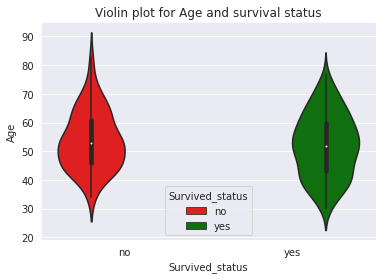

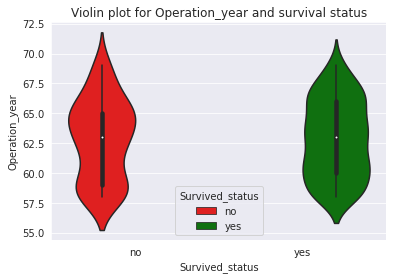

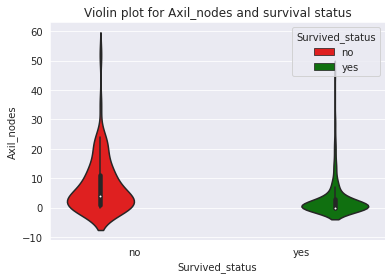

In [49]:
for idx, features in enumerate(surv.columns[:-1]):
    sns.violinplot(x = 'Survived_status', y = features,hue = 'Survived_status', data = df,palette=['red','green']).set_title("Violin plot for "+str(features)+" and survival status")
    plt.show()

### Observations :
    Remarkably, most of data is overlapping too much to differentiate different survival_status.

#### Axil_Nodes

1. The plot is quite skewed due to large no. of outliers in the feature
2. More than 75% patients who survived had nodes less 4.
3. As 50th percentile for axillary node is zero, from above plots we can see that patients with less number of axillary node have higher rate of survival.
4. Patients who died seems to have more nodes as we can see by comparing the size of the box plots.
5. There seems to be a lot of Nodes as an outlier in case of both who survived and those who didn't.

### Multivariate Analysis:

* Multivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them

#### 5)Pairplots:

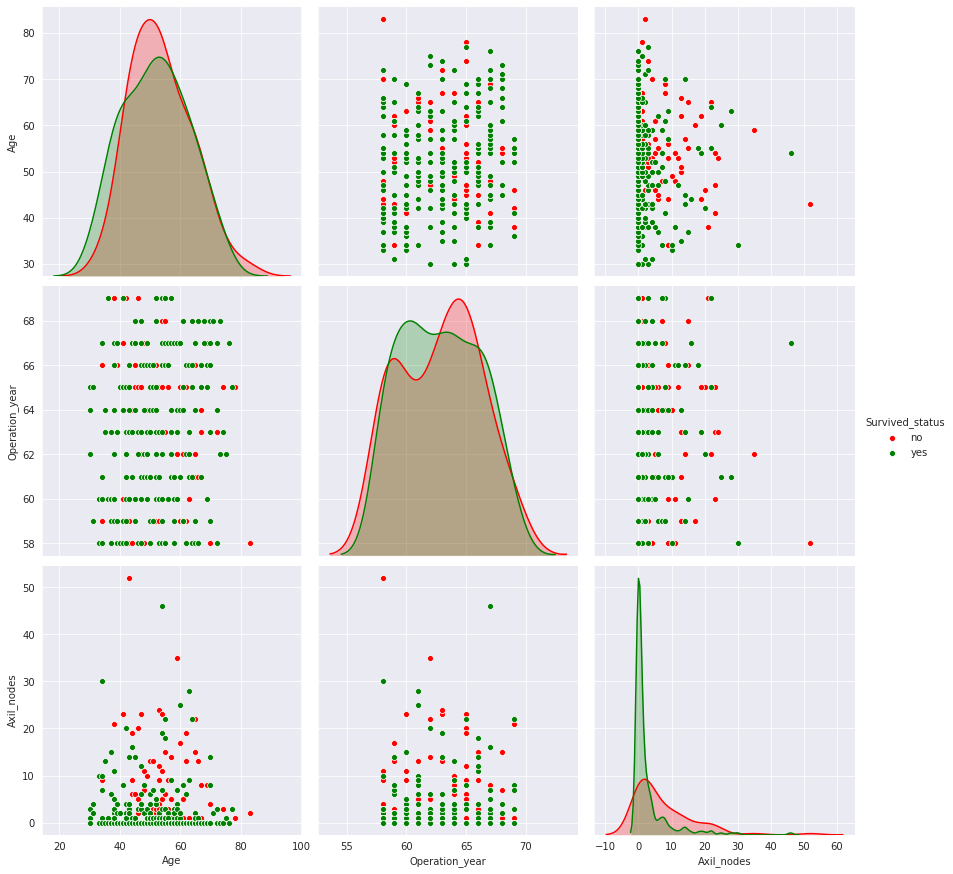

In [50]:
sns.set_style("darkgrid")
sns.pairplot(df, hue = 'Survived_status', height = 4,vars = ['Age', 'Operation_year', 'Axil_nodes'],palette=['red','green']);

### Observations :
* Similarly in pair plots, most of data is overlapping too much to differentiate different survival_status. None of the features helps in classifying the data.
* There are lots of patients with very few axillary nodes (None or 1 node). But with a dataset as imbalanced as this, this might be misleading.
* We know that No. of patients who had 0 axillary nodes and still died are 19 patients,but the 0 nodes region doesn't showcase anything like this.
* This is a huge drawback of scatterplot (even if it's colored by class label) and can be very misleading.

#### 6)Heatmap

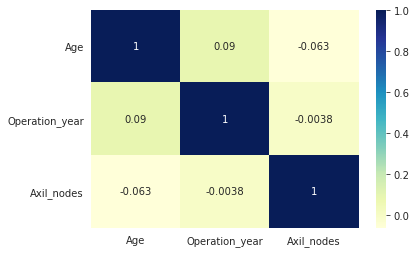

In [52]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

##### As we changed target variable in to categorical type, So heatmap doesnt shows much information to us

### Conclusion :

* If a patient has only less than 3 nodes, their chances of survival increases drastically.
* Most of the data (especially year and age) is overlapping too much to differentiate between survival_status.
* The dataset is quite imbalanced, hence this kind of illegible analysis is pretty much futile if the objective is classification.

### Lets start building some models:

In [55]:
X = df.drop('Survived_status', axis=1)
y = df.Survived_status

In [57]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1,stratify=df.Survived_status)

In [58]:
print("Trainshape:",X_train.shape)
print("Testshape:",X_test.shape)

Trainshape: (214, 3)
Testshape: (92, 3)


In [60]:
# Data standardization
# To make our dataset in a good scale, we need to implement feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### 1)Logistic Regression:

score:  0.7717391304347826


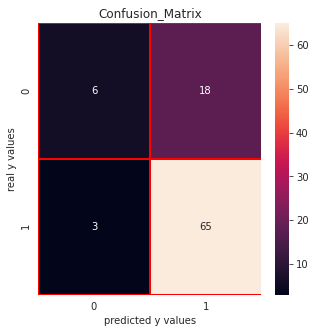

precision_score:  0.7527501309586171
recall_score:  0.7717391304347826
f1_score:  0.7311991204879199


In [61]:
lrc = LogisticRegression()
lrc.fit(X_train,y_train)
print("score: ", lrc.score(X_test,y_test))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test,lrc.predict(X_test))

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion_Matrix")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test,lrc.predict(X_test),average='weighted'))
print("recall_score: ", recall_score(y_test,lrc.predict(X_test),average='weighted'))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test,lrc.predict(X_test),average='weighted'))

### 2)DecisionTreeClassifier

score:  0.6739130434782609


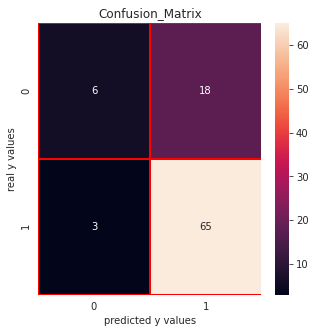

precision_score:  0.6739130434782609
recall_score:  0.6739130434782609
f1_score:  0.6739130434782609


In [62]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print("score: ", dtc.score(X_test,y_test))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,dtc.predict(X_test))

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion_Matrix")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test,dtc.predict(X_test),average='weighted'))
print("recall_score: ", recall_score(y_test,dtc.predict(X_test),average='weighted'))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test,dtc.predict(X_test),average='weighted'))

### 3)RandomForestClassifier

score:  0.6956521739130435


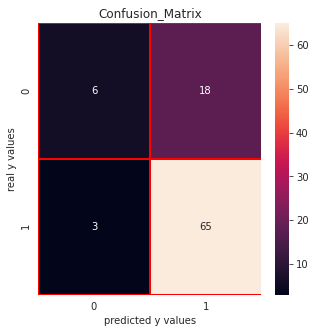

precision_score:  0.6707794751273013
recall_score:  0.6956521739130435
f1_score:  0.6803429271279853


In [63]:
rfc = RandomForestClassifier(n_estimators = 100,random_state = 0)
rfc.fit(X_train,y_train)
print("score: ", rfc.score(X_test,y_test))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,rfc.predict(X_test))

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion_Matrix")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test,rfc.predict(X_test),average='weighted'))
print("recall_score: ", recall_score(y_test,rfc.predict(X_test),average='weighted'))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test,rfc.predict(X_test),average='weighted'))

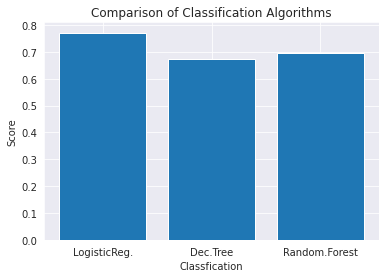

In [64]:
y = np.array([lrc.score(X_test,y_test),dtc.score(X_test,y_test),rfc.score(X_test,y_test)])
x = ["LogisticReg.","Dec.Tree","Random.Forest"]

plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()

##### The most successful one is Logistic Regression with 77% score when compare to others with out Feature Engineering